# HR Analytics Project- Understanding the Attrition in HR
Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

 

# Importing Required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df=pd.read_csv('Hr attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

The dataset is having 1470 no. of rows and 35 columns

In [4]:
df.isnull().sum().sum()

0

We can observe that there are no null values in the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [7]:
#Lets separating categorical varibale and continous varibales
#Checking for Categorical columns
Cat_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        Cat_col.append(i)
print(Cat_col)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [8]:
# Checking for Continous columns
num_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        num_col.append(i)
print(num_col)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


# EDA

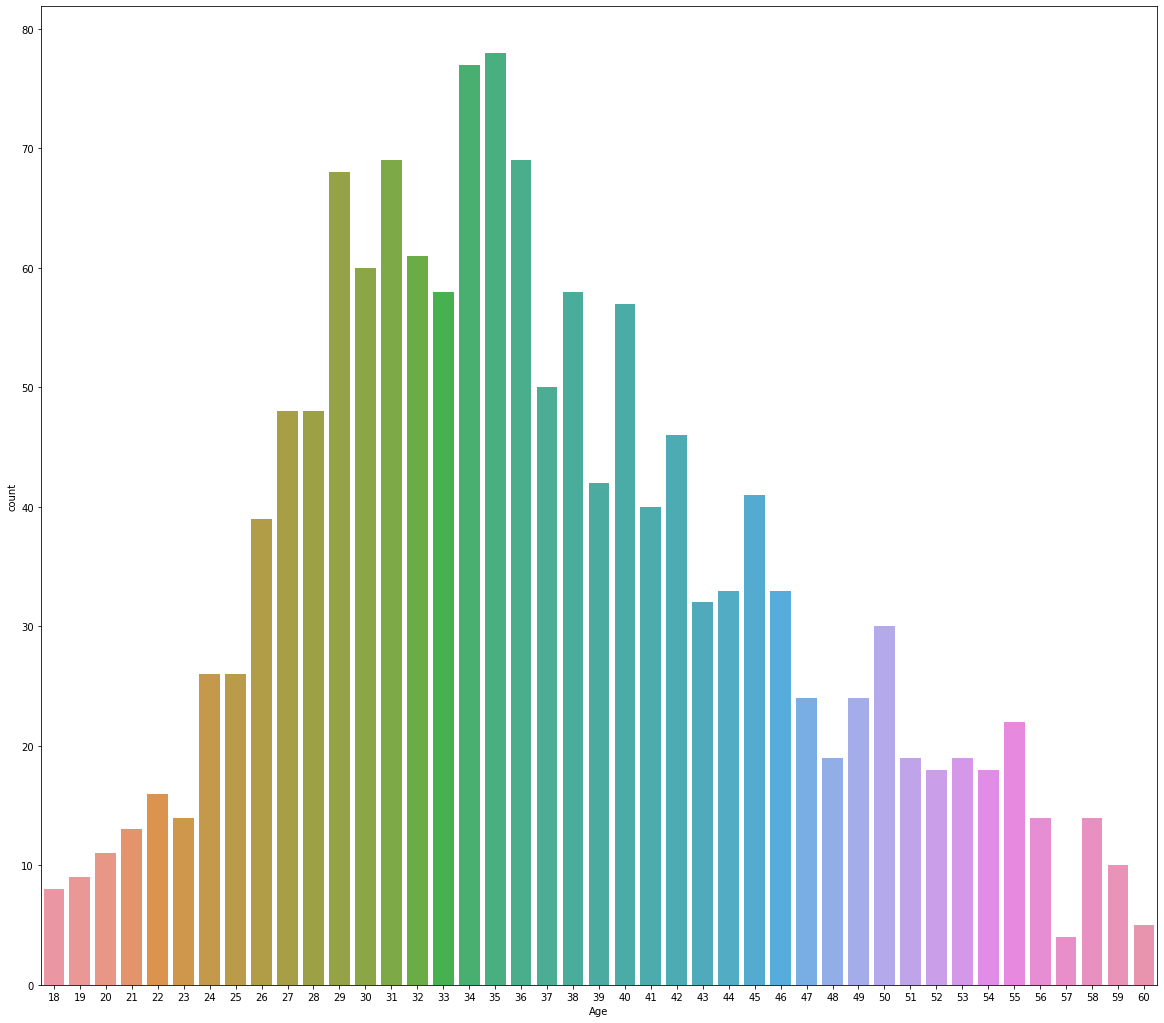

In [9]:
plt.figure(figsize=(20,18))
ax=sns.countplot(x='Age',data=df)


We can observe that most of the employees aged between 27 to 36

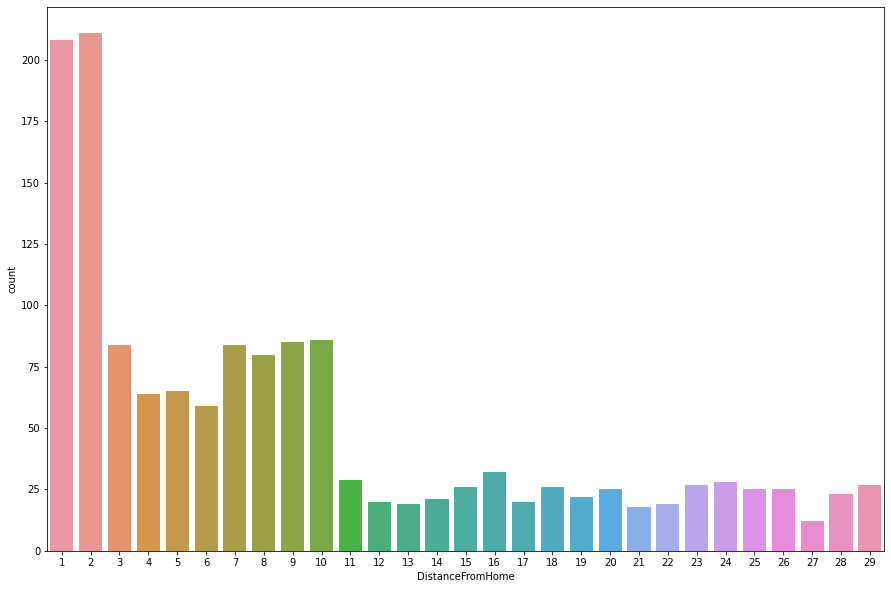

In [10]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x='DistanceFromHome',data=df)

Most of the Employee working at a distance of 1 to 2 units from home

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

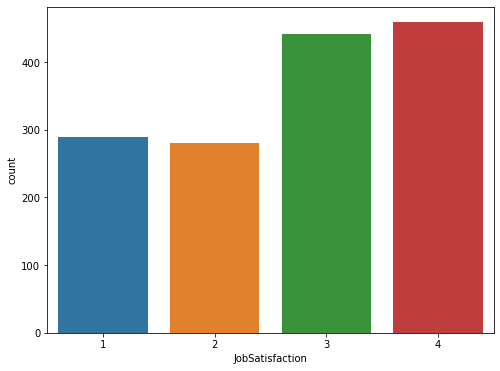

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(df['JobSatisfaction'])

We can observe that most of the employees are satisfied from their jobs

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='count'>

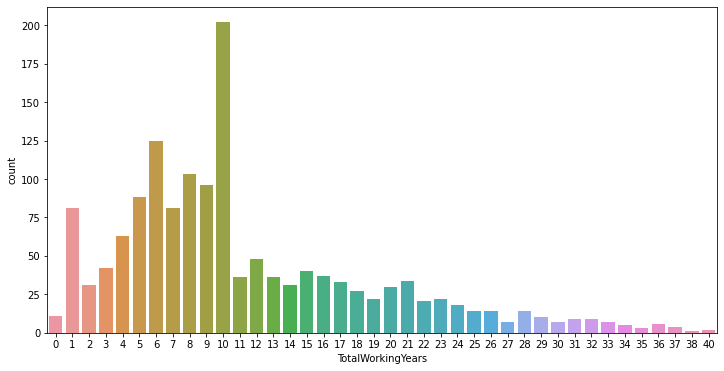

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(df['TotalWorkingYears'])

Most of the employees having working experience between 5-10 years

<AxesSubplot:xlabel='Education', ylabel='count'>

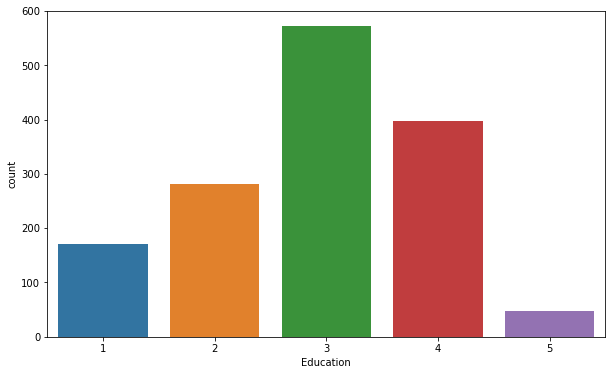

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(df['Education'])

most of the emplooyee persued level 3 education

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

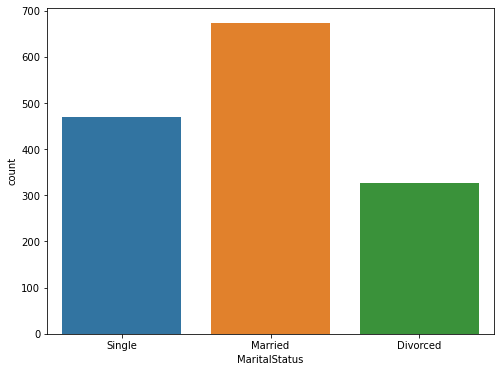

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(df['MaritalStatus'])


We can observe that employess are mostly married

No     1233
Yes     237
Name: Attrition, dtype: int64


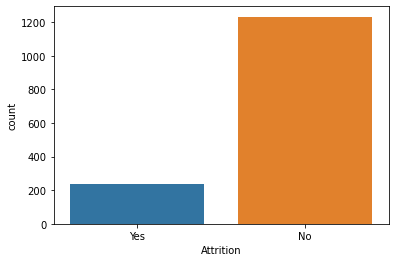

In [15]:

ax=sns.countplot(x='Attrition',data=df)
print(df['Attrition'].value_counts())

 We can observe that maximimum observations showing no atttrition

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


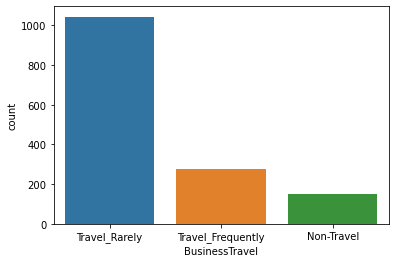

In [16]:

ax=sns.countplot(x='BusinessTravel',data=df)
print(df['BusinessTravel'].value_counts())

 We can observe that maximum people are travelling rarelly

In [17]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


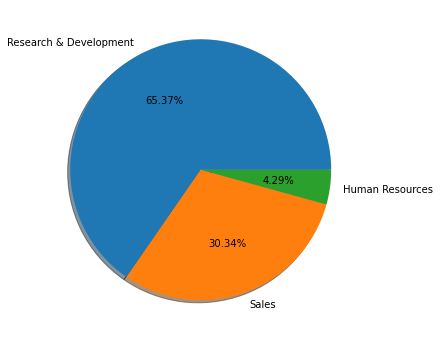

In [18]:
print(df['Department'].value_counts())
labels='Research & Development','Sales','Human Resources'
fig,ax = plt.subplots(figsize=(10,6))
ax.pie(df['Department'].value_counts(),labels=labels,autopct='%1.2f%%',shadow=True)
plt.show()

We can observe that most of the employees are from Research and Development field

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


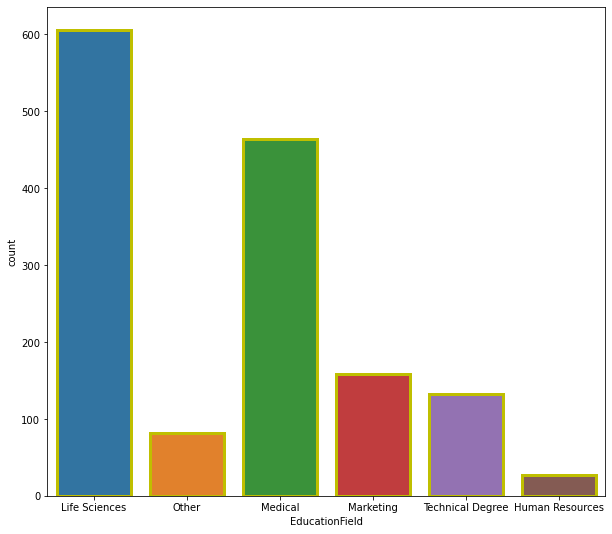

In [19]:

plt.figure(figsize=(10,9))
ax=sns.countplot(x='EducationField',data=df,edgecolor="y",linewidth=3)
print(df['EducationField'].value_counts())

We can observe that most of the poeple are from Life science background

Male      882
Female    588
Name: Gender, dtype: int64


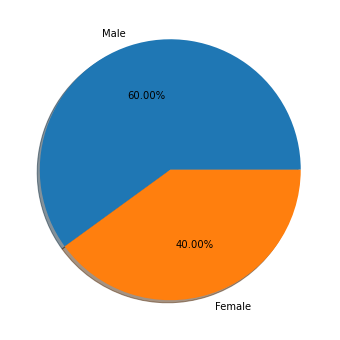

In [20]:
print(df['Gender'].value_counts())
labels='Male','Female'
fig,ax = plt.subplots(figsize=(10,6))
ax.pie(df['Gender'].value_counts(),labels=labels,autopct='%1.2f%%',shadow=True)
plt.show()

We can observe that maximum employees are male

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


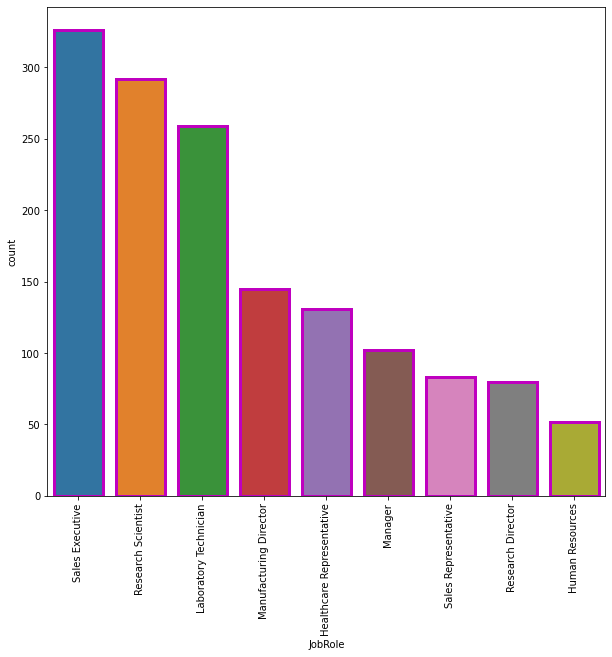

In [21]:
plt.figure(figsize=(10,9))
ax=sns.countplot(x='JobRole',data=df,edgecolor="m",linewidth=3)
plt.xticks(rotation=90)
print(df['JobRole'].value_counts())

We can observe that maximum people are Sales Executives and very less people belongs to Human Resourses

No     1054
Yes     416
Name: OverTime, dtype: int64


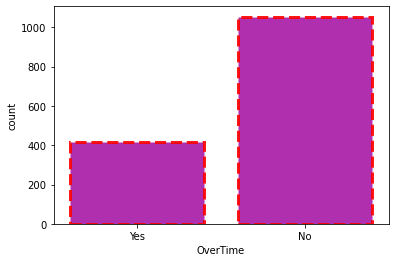

In [22]:

ax=sns.countplot(x='OverTime',data=df,linestyle="--",color='m',edgecolor="r",alpha=0.9,linewidth=3)
print(df['OverTime'].value_counts())

We can oberve that most of the employess are not doing overtime

In [23]:
df_cont=df[num_col]

In [24]:
df_cont.shape

(1470, 26)

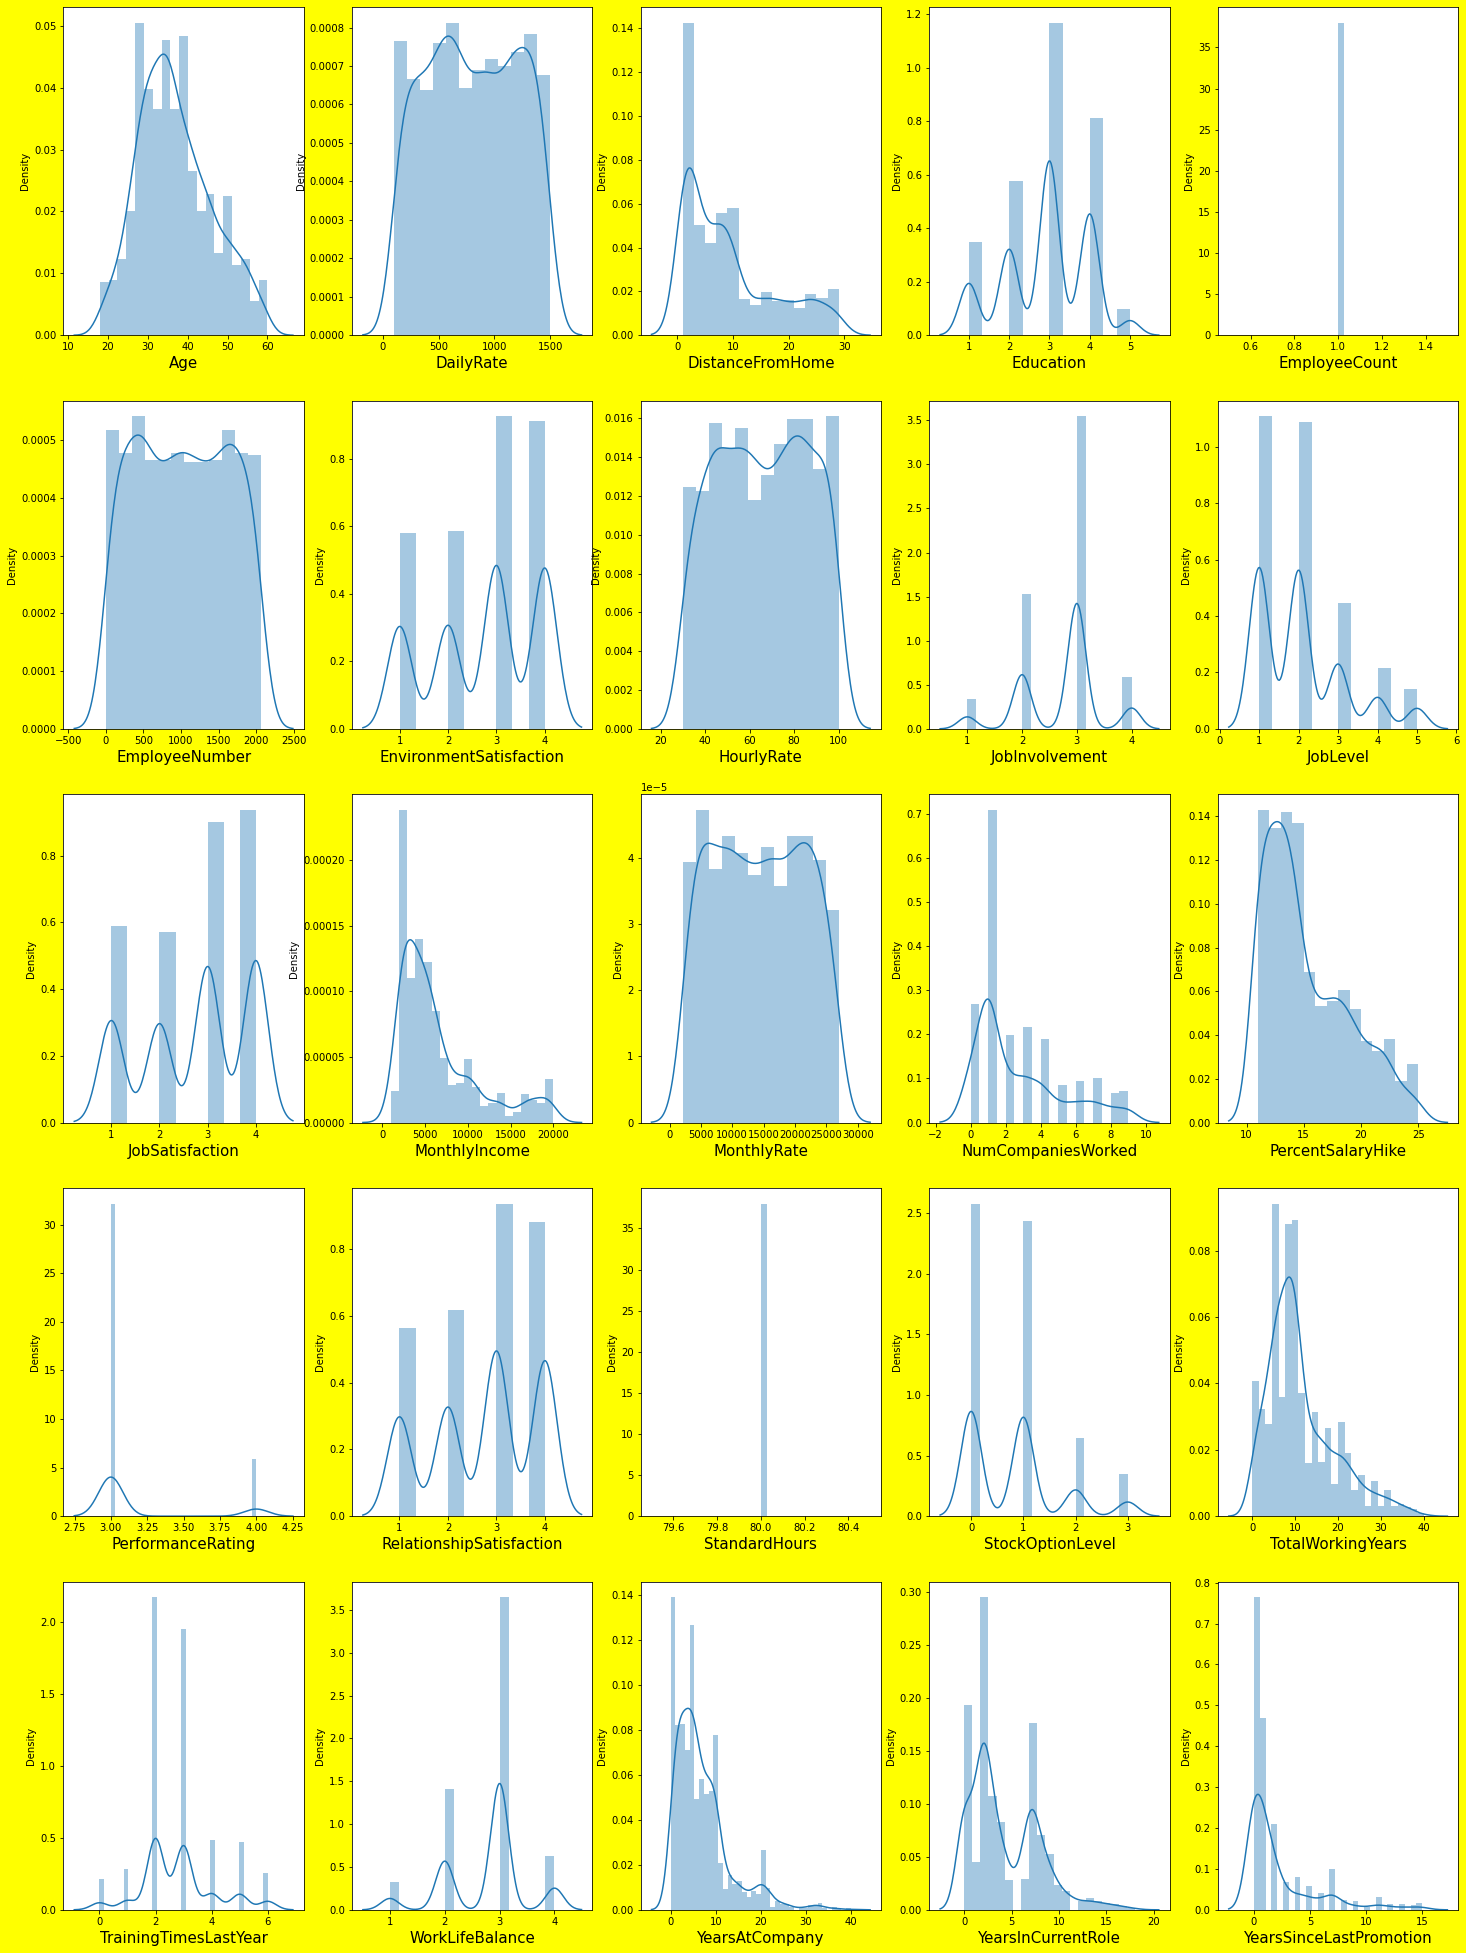

In [25]:
plt.figure(figsize=(25,35),facecolor='yellow')
plotnumber=1

for column in df_cont:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(df_cont[column])
        plt.xlabel(column,fontsize=15)
    plotnumber=plotnumber+1

plt.show()

From above plot we can conclude that none of the column follow normal distribution, all most all the column is having skewness and needs to be removed later



<AxesSubplot:xlabel='MonthlyIncome', ylabel='TotalWorkingYears'>

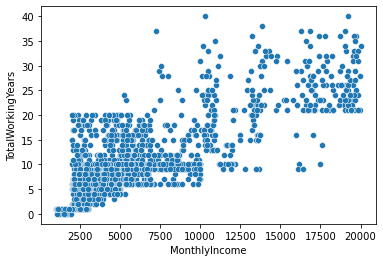

In [26]:
sns.scatterplot(df['MonthlyIncome'],df['TotalWorkingYears'])

We can observe that as total working years increases monthly income also increases

<AxesSubplot:xlabel='MonthlyIncome', ylabel='NumCompaniesWorked'>

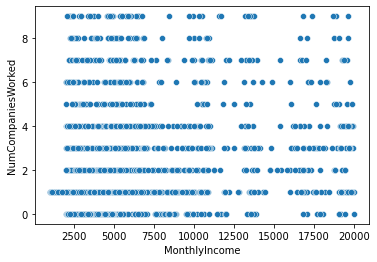

In [27]:
sns.scatterplot(df['MonthlyIncome'],df['NumCompaniesWorked'])

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Attrition'>

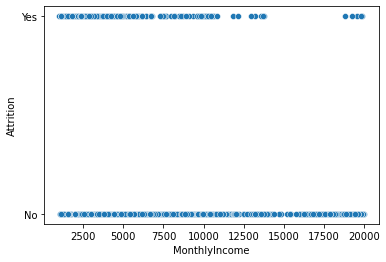

In [28]:
sns.scatterplot(x='MonthlyIncome',y="Attrition",data=df)


We can observe that attrition is proportional to monthly income till monthly income=14000

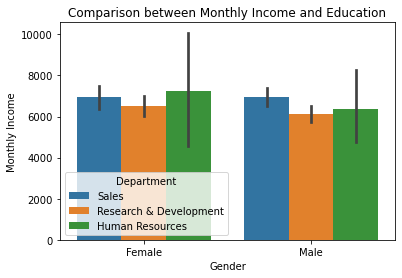

In [29]:
plt.figure(figsize=(6,4))
plt.title("Comparison between Monthly Income and Education")
sns.barplot(df['Gender'],df['MonthlyIncome'],hue='Department',data = df)
plt.xlabel("Gender")
plt.ylabel("Monthly Income")
plt.show()

We can observe that in Females maximum income is from Human Resources Depatment and in males it is from Sales department

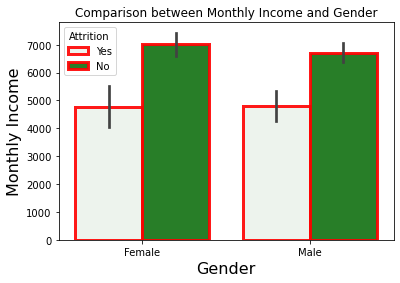

In [30]:
plt.figure(figsize=(6,4))
plt.title("Comparison between Monthly Income and Gender")
sns.barplot(df['Gender'],df['MonthlyIncome'],hue='Attrition',data = df,color='green',edgecolor="r",alpha=0.9,linewidth=3)
plt.xlabel("Gender",fontsize=16)
plt.ylabel("Monthly Income",fontsize=16)
plt.show()

We can observe that in both male and females attrition is less 

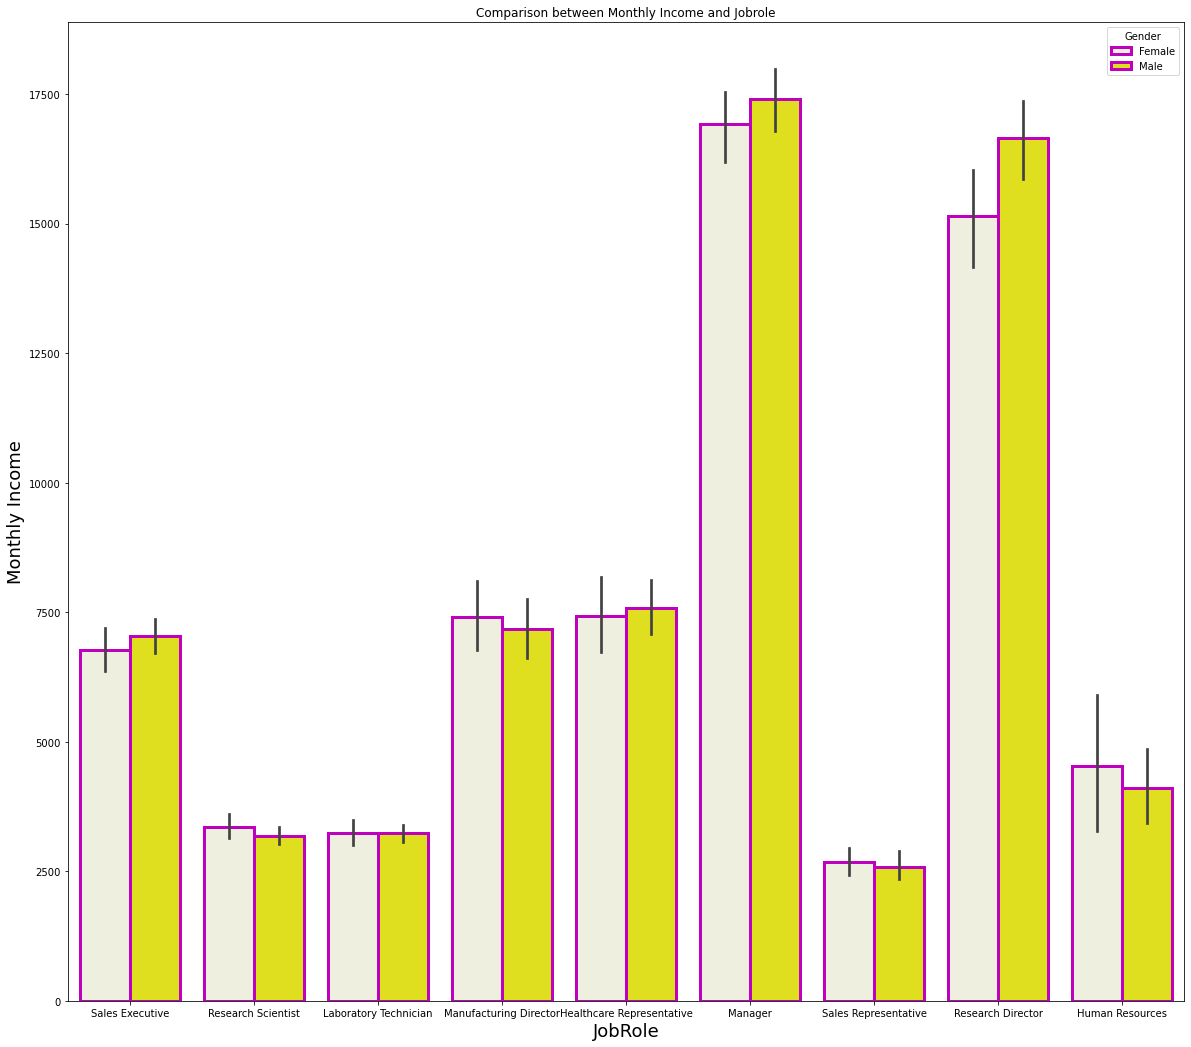

In [31]:
plt.figure(figsize=(20,18))
plt.title("Comparison between Monthly Income and Jobrole")
sns.barplot(df['JobRole'],df['MonthlyIncome'],hue='Gender',data = df,color='yellow',edgecolor="m",linewidth=3)
plt.xlabel("JobRole",fontsize=18)
plt.ylabel("Monthly Income",fontsize=18)
plt.show()

### Now using encoder to encode the target variable

In [32]:
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()


In [33]:
for i in Cat_col:
    df[i]=enc.fit_transform(df[i])
    


In [34]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [35]:
df.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

We have observe that we encoded categorical data into numerical

# Checking for Corrrelation

### Plotting heatmap

In [36]:
df=df.drop(columns=['StandardHours','Over18','EmployeeCount'],axis=1)

We are dropping unnecessary columns

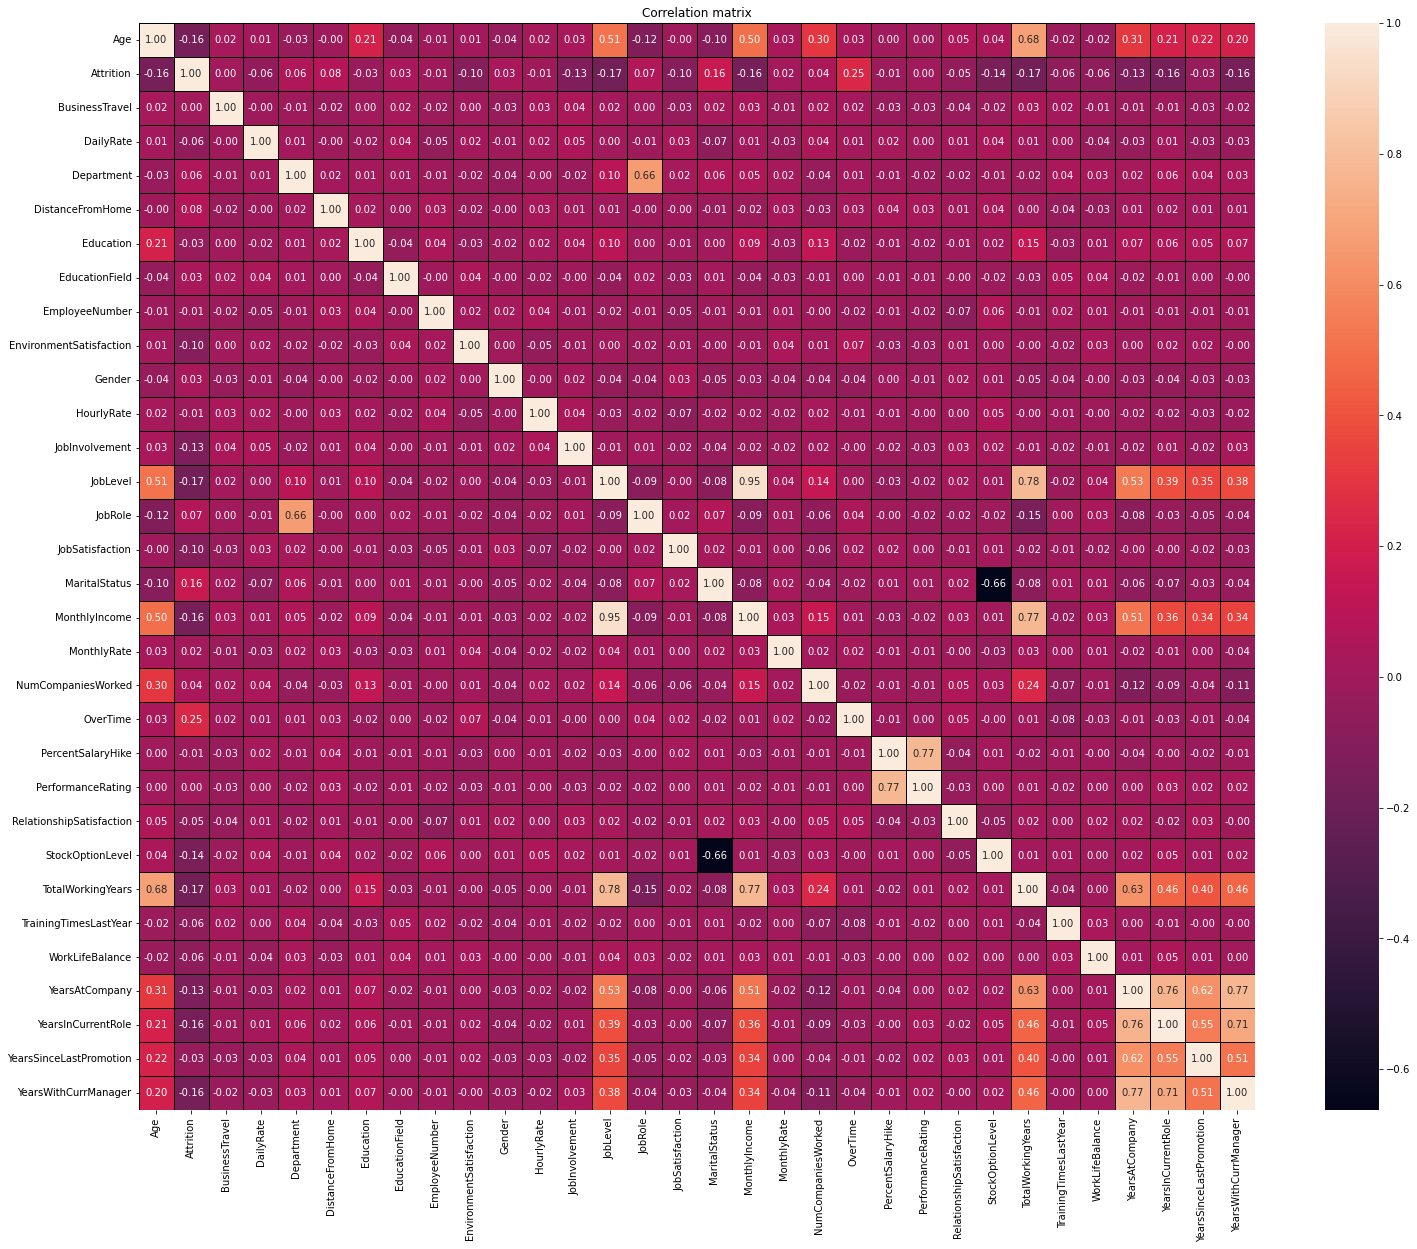

In [37]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')
plt.title("Correlation matrix")
plt.savefig('Correlation matrix.jpg')
plt.show()

here we can see both positive and negative corelation with target variable

---Highest correlation with target variable is 'over time' ie 25%

---lowest corelation with target variable is 'total working years' ie 17%

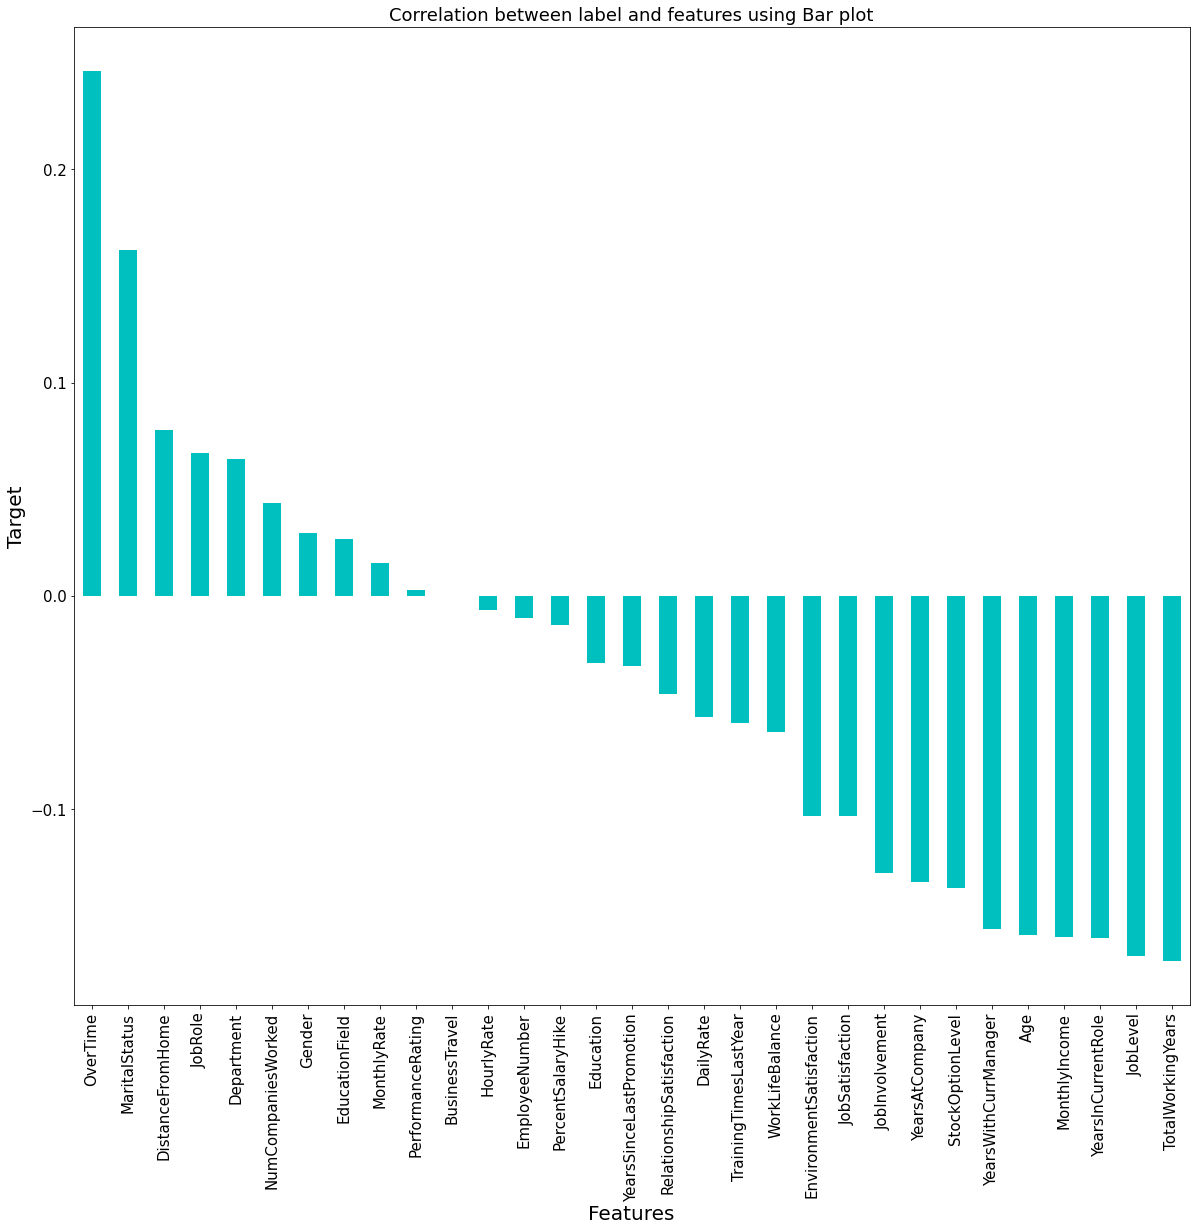

In [38]:
plt.figure(figsize=(20,18))
df.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar',color='c',fontsize=15)
plt.xlabel('Features',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Correlation between label and features using Bar plot',fontsize=18)
plt.show()

POSITEVLY CORELATED COLUMN-:
       ['OverTime','Marital status','Distance from home','Job role,Department','Number of companies worked','Gender','Educationfeild','Monthly rate','Performance rating']

NEGATIVELY CORELATED COLUMN-:[Total working years , Job level,Years in current role , Monthly income , Age,Years with curr manager
                              ,Stock option level,Years at company,job involment,job satisfaction,Environment satisfaction,
                              Work life balance,Training time last year,Daily rate]

# Checking Skewess

In [39]:
df=df.drop(columns=['BusinessTravel','PerformanceRating'],axis=1)

Removed these columns as they are contributing 0 to the target varibale

In [40]:
df.skew()

Age                         0.413286
Attrition                   1.844366
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
Y

Setting skewness limit to -0.65to +0.65
 
    We can observe that columns(Attrition, DistanceFrom Home, JobLevel, MonthlyIncome, NumCompaniesWorked, Overtime, PercentSalaryHike, StockOptionLevel, TotolWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager) are having skewness values above the limit

# Checking for Outliers

In [41]:
df.shape

(1470, 30)

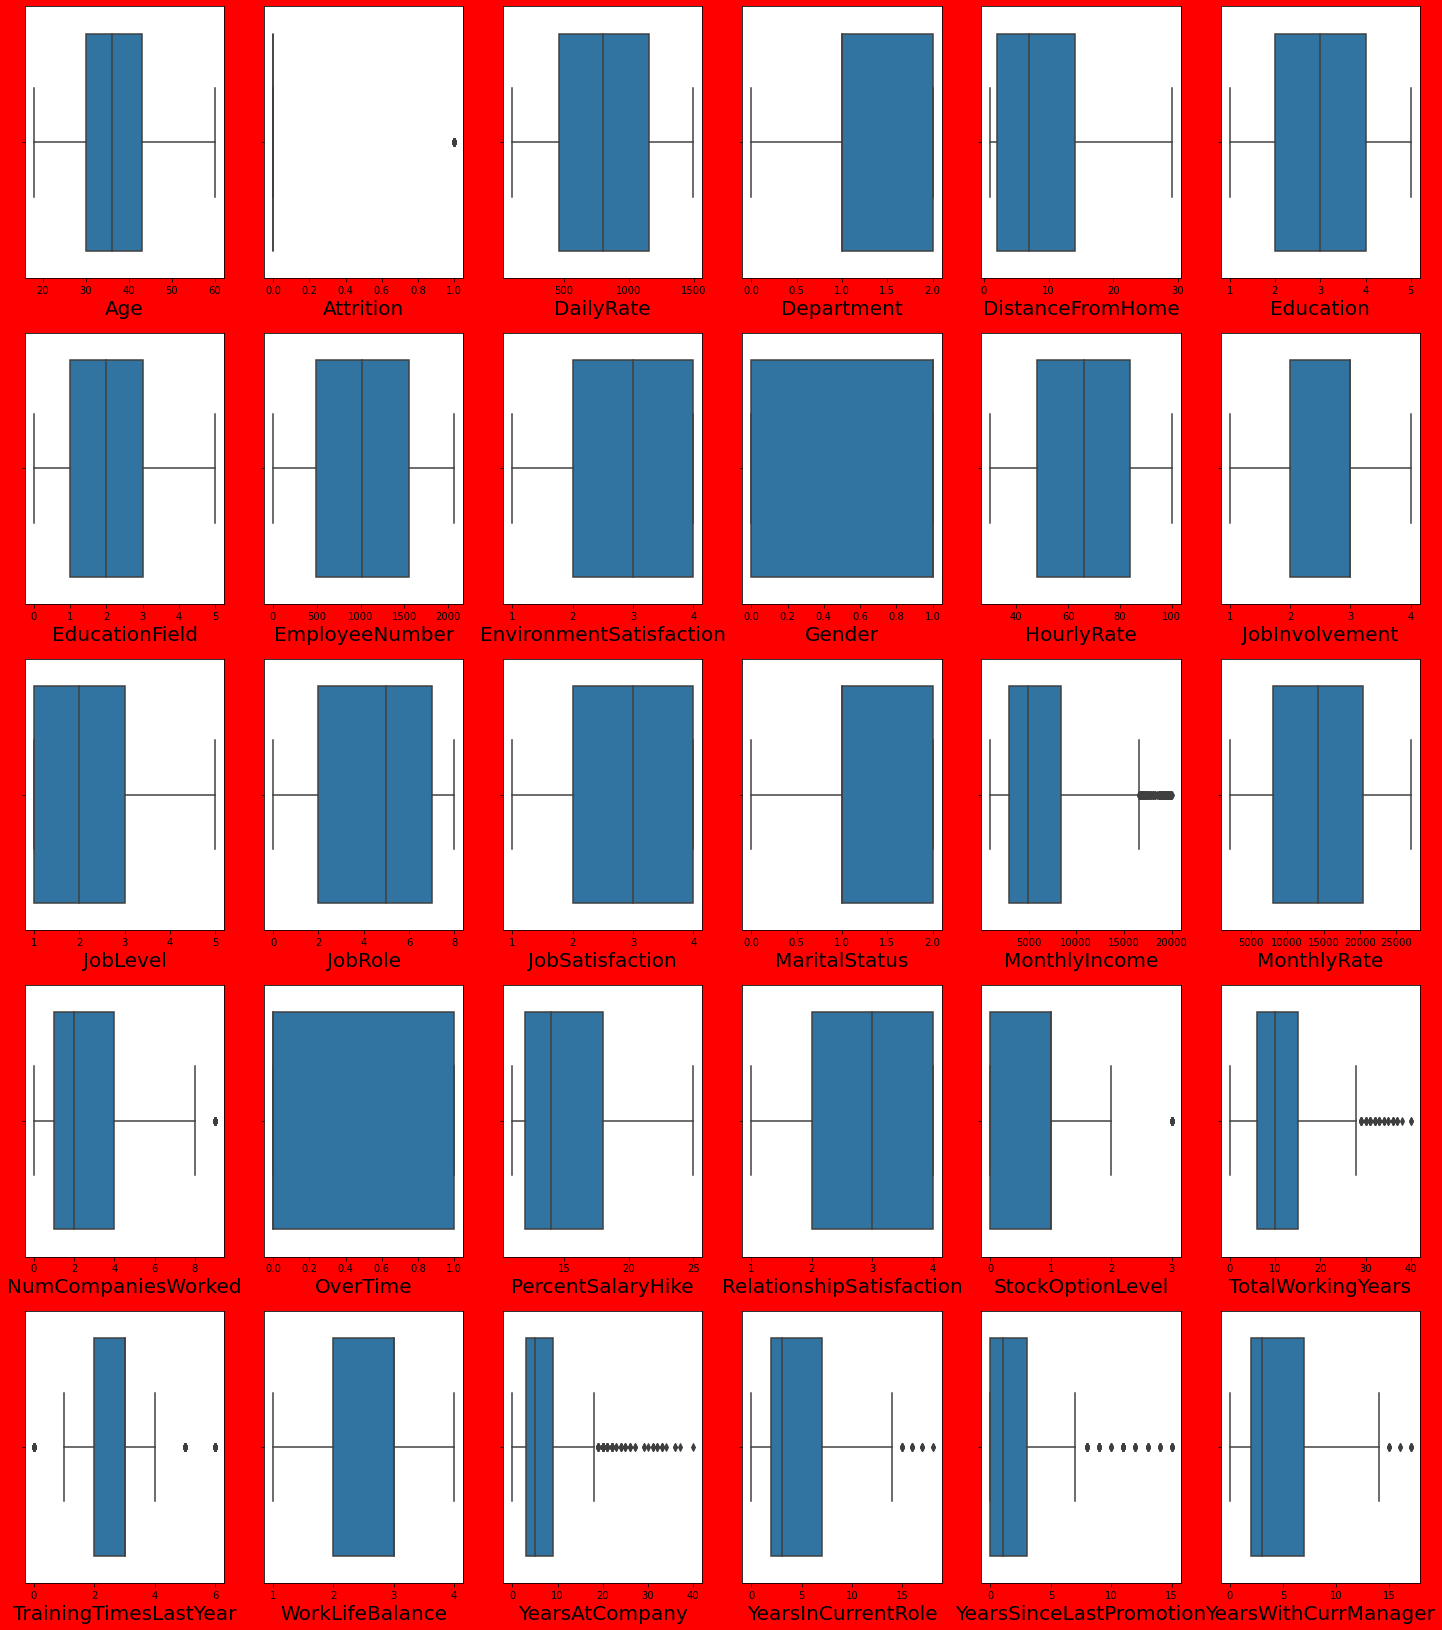

In [42]:
plt.figure(figsize=(25,35),facecolor= 'red')
plotnumber = 1


for column in df:
    if plotnumber<=32:
        plt.subplot(6,6,plotnumber)
        ax=sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

We can obsere that columns :-

           (TrainingTImesLastYear, YearsAtComapny,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,
            TotalWorkingYears,MOnthlyIncome,StockOptionLevel,NumComapniesWorked) are having outliers and need to be removed

# DataPreprocessing

### Removing Outliers using Z-technique

In [43]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape
z

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,2.280906,0.742527,1.401512,1.010909,0.891688,0.937414,1.701283,0.660531,1.224745,...,1.150554,1.584178,0.932014,0.421642,2.171982,2.493820,0.164613,0.063296,0.679146,0.245834
1,1.322365,0.438422,1.297775,0.493817,0.147150,1.868426,0.937414,1.699621,0.254625,0.816497,...,2.129306,1.191438,0.241988,0.164511,0.155707,0.338096,0.488508,0.764998,0.368715,0.806541
2,0.008343,2.280906,1.414363,0.493817,0.887515,0.891688,1.316673,1.696298,1.169781,0.816497,...,0.057267,0.658973,0.932014,0.550208,0.155707,0.338096,1.144294,1.167687,0.679146,1.155935
3,0.429664,0.438422,1.461466,0.493817,0.764121,1.061787,0.937414,1.694636,1.169781,1.224745,...,1.150554,0.266233,0.932014,0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,1.155935
4,1.086676,0.438422,0.524295,0.493817,0.887515,1.868426,0.565311,1.691313,1.575686,0.816497,...,0.877232,1.191438,0.241988,0.678774,0.155707,0.338096,0.817734,0.615492,0.058285,0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.101159,0.438422,0.202082,0.493817,1.703764,0.891688,0.565311,1.721670,0.254625,0.816497,...,0.489376,0.266233,0.241988,0.735447,0.155707,0.338096,0.327893,0.615492,0.679146,0.314873
1466,0.227347,0.438422,0.469754,0.493817,0.393938,1.868426,0.565311,1.723332,1.169781,0.816497,...,0.057267,1.584178,0.241988,0.293077,1.707500,0.338096,0.001333,0.764998,0.368715,0.806541
1467,1.086676,0.438422,1.605183,0.493817,0.640727,0.085049,0.937414,1.726655,0.660531,0.816497,...,1.309341,0.658973,0.241988,0.678774,2.171982,0.338096,0.164613,0.615492,0.679146,0.314873
1468,1.322365,0.438422,0.546677,1.401512,0.887515,0.085049,0.565311,1.728317,1.169781,0.816497,...,0.330589,1.191438,0.932014,0.735447,0.155707,1.077862,0.325228,0.488900,0.679146,1.086895


In [44]:
df_new=df[(z<3).all(axis=1)]
print("old dataframe",df.shape)
print("new dataframe",df_new.shape)
print("total number of rows dropped",df.shape[0]-df_new.shape[0])

old dataframe (1470, 30)
new dataframe (1387, 30)
total number of rows dropped 83


Hence the total number of rows dropped from the dataset is 83

### Percentage data loss

In [45]:
loss_percent=(1470-1387)/1470*100
loss_percent

5.646258503401361

We can see that data loss is less than 10%.So its safe to remove outliers

### Separating features and target variable as x and y

In [46]:
x=df_new.drop(columns=['Attrition'],axis=1)
y=df_new['Attrition']

In [47]:
x.shape

(1387, 29)

In [48]:
y.shape

(1387,)

# Feature Selection using Select Percentile Method

In [49]:
from sklearn.feature_selection import SelectPercentile,chi2

In [50]:
spercentile=SelectPercentile(score_func=chi2,percentile=80)
spercentile=spercentile.fit(x,y)
cols=spercentile.get_support(indices=True)

In [51]:
print('Feature index=',cols)


Feature index= [ 0  1  2  3  6  7 10 11 12 13 14 15 16 17 18 20 21 22 23 25 26 27 28]


In [52]:
features=x.columns[cols]   

print('Features=',list(features))

Features= ['Age', 'DailyRate', 'Department', 'DistanceFromHome', 'EmployeeNumber', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [53]:
df_scores=pd.DataFrame({'features':x.columns,'Chi2score':spercentile.scores_,'pvalue':spercentile.pvalues_})

In [54]:
df_scores.sort_values(by='Chi2score',ascending=False)

,features,Chi2score,pvalue
15,MonthlyIncome,108739.104549,0.000000e+00
16,MonthlyRate,1066.236327,7.199964e-234
1,DailyRate,915.089308,5.147740e-201
22,TotalWorkingYears,208.070075,3.621844e-47
25,YearsAtCompany,137.733136,8.335899e-32
26,YearsInCurrentRole,110.331536,8.289928e-26
28,YearsWithCurrManager,102.024111,5.485008e-24
0,Age,75.845872,3.066929e-18
3,DistanceFromHome,66.101135,4.283689e-16
18,OverTime,65.641342,5.409209e-16


In [55]:
x=df_new[['Age', 'DailyRate', 'Department', 'DistanceFromHome', 'EmployeeNumber', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [56]:
x.shape

(1387, 23)

In [57]:
y.shape

(1387,)

# Handling imbalanced dataset

Since target variable is imbalanced and size of dataset is small so we will do oversampling

### Over sampling using SMOTE

In [58]:
import sys
from collections import Counter
import joblib
import six
from sklearn.model_selection import train_test_split
sys.modules['sklearn.externals.six']=six
sys.modules['sklearn.externals.joblib']=joblib
from sklearn.model_selection import train_test_split

In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.75,random_state=42)

In [61]:
over_smpl=SMOTE(0.75)
x_train_ns,y_train_ns=over_smpl.fit_resample(x_train,y_train)

In [62]:
print("The number of classes before fit{}".format(Counter(y_train)))

The number of classes before fitCounter({0: 282, 1: 64})


In [63]:
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes after fitCounter({0: 282, 1: 211})


# Removing skewness using data transforamtion

In [64]:
from sklearn.preprocessing import power_transform

x_new=power_transform(x,method='yeo-johnson')
x_new

array([[ 0.61013332,  0.75061538,  1.37988121, ...,  0.29052433,
        -1.07353381,  0.58217664],
       [ 1.37182973, -1.34337244, -0.4734996 , ...,  1.0065754 ,
         0.19316755,  1.01807316],
       [ 0.18248603,  1.33708042, -0.4734996 , ..., -1.57181404,
        -1.07353381, -1.52842596],
       ...,
       [-1.0804891 , -1.75453754, -0.4734996 , ..., -0.39076907,
        -1.07353381,  0.01867962],
       [ 1.37182973,  0.57328582,  1.37988121, ...,  0.79376377,
        -1.07353381,  1.20578193],
       [-0.16377603, -0.37222758, -0.4734996 , ..., -0.01873824,
         0.19316755, -0.3478709 ]])

In [66]:
x=pd.DataFrame(x_new,columns=x.columns)

In [67]:
x

,Age,DailyRate,Department,DistanceFromHome,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,NumCompaniesWorked,OverTime,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.610133,0.750615,1.379881,-1.489968,-2.167233,-0.712215,0.322170,0.349828,1.017588,1.186326,...,1.620671,1.584737,-1.524369,-1.084263,-0.173231,-2.608524,0.231837,0.290524,-1.073534,0.582177
1,1.371830,-1.343372,-0.473500,0.244561,-2.157256,0.204826,-1.065841,0.349828,0.596961,-0.725589,...,-0.561880,-0.631019,1.235448,0.548653,0.147620,0.217074,0.948319,1.006575,0.193168,1.018073
2,0.182486,1.337080,-0.473500,-1.028366,-2.139969,1.210036,-1.065841,-1.141761,-1.022696,0.181993,...,1.273711,1.584737,-0.690386,-1.084263,-0.351153,0.217074,-2.156089,-1.571814,-1.073534,-1.528426
3,-0.284736,1.377080,-0.473500,-0.698191,-2.132165,1.210036,0.322170,-1.141761,0.596961,0.181993,...,-0.561880,1.584737,0.235192,-1.084263,-0.173231,0.217074,0.621429,1.006575,1.027520,-1.528426
4,-1.080489,-0.467301,-0.473500,-1.028366,-2.117665,-1.522916,0.322170,-1.141761,-1.022696,-0.725589,...,1.764103,-0.631019,1.235448,0.548653,-0.544046,0.217074,-0.933983,-0.390769,0.722874,-0.347871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,0.069696,0.252885,-0.473500,1.408969,1.533695,0.204826,2.016459,0.349828,-1.022696,1.186326,...,0.798319,-0.631019,0.235192,0.548653,1.039364,0.217074,0.003289,-0.390769,-1.073534,0.018680
1383,0.400794,-0.410602,-0.473500,-0.049519,1.534945,1.210036,-1.065841,1.133237,-1.768432,-1.517783,...,0.798319,-0.631019,-1.524369,0.548653,-0.007630,1.606919,0.436162,1.006575,0.193168,1.018073
1384,-1.080489,-1.754538,-0.473500,-0.440553,1.537447,-0.712215,2.016459,0.349828,-0.227587,-0.725589,...,-0.561880,1.584737,-0.690386,0.548653,-0.544046,-2.608524,0.231837,-0.390769,-1.073534,0.018680
1385,1.371830,0.573286,1.379881,-1.028366,1.538697,1.210036,-1.065841,0.349828,1.017588,-0.725589,...,0.052119,-0.631019,1.235448,-1.084263,1.039364,0.217074,0.791264,0.793764,-1.073534,1.205782


In [68]:
x.skew()

Age                        -0.004079
DailyRate                  -0.199742
Department                  0.015095
DistanceFromHome           -0.008149
EmployeeNumber             -0.287518
EnvironmentSatisfaction    -0.205472
JobInvolvement             -0.018801
JobLevel                    0.110769
JobRole                    -0.337641
JobSatisfaction            -0.217730
MaritalStatus              -0.158253
MonthlyIncome               0.027700
MonthlyRate                -0.176560
NumCompaniesWorked          0.016175
OverTime                    0.954751
RelationshipSatisfaction   -0.191406
StockOptionLevel            0.089929
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.057949
YearsAtCompany             -0.025230
YearsInCurrentRole         -0.069631
YearsSinceLastPromotion     0.212301
YearsWithCurrManager       -0.070570
dtype: float64

We can observe that skewness has been removed

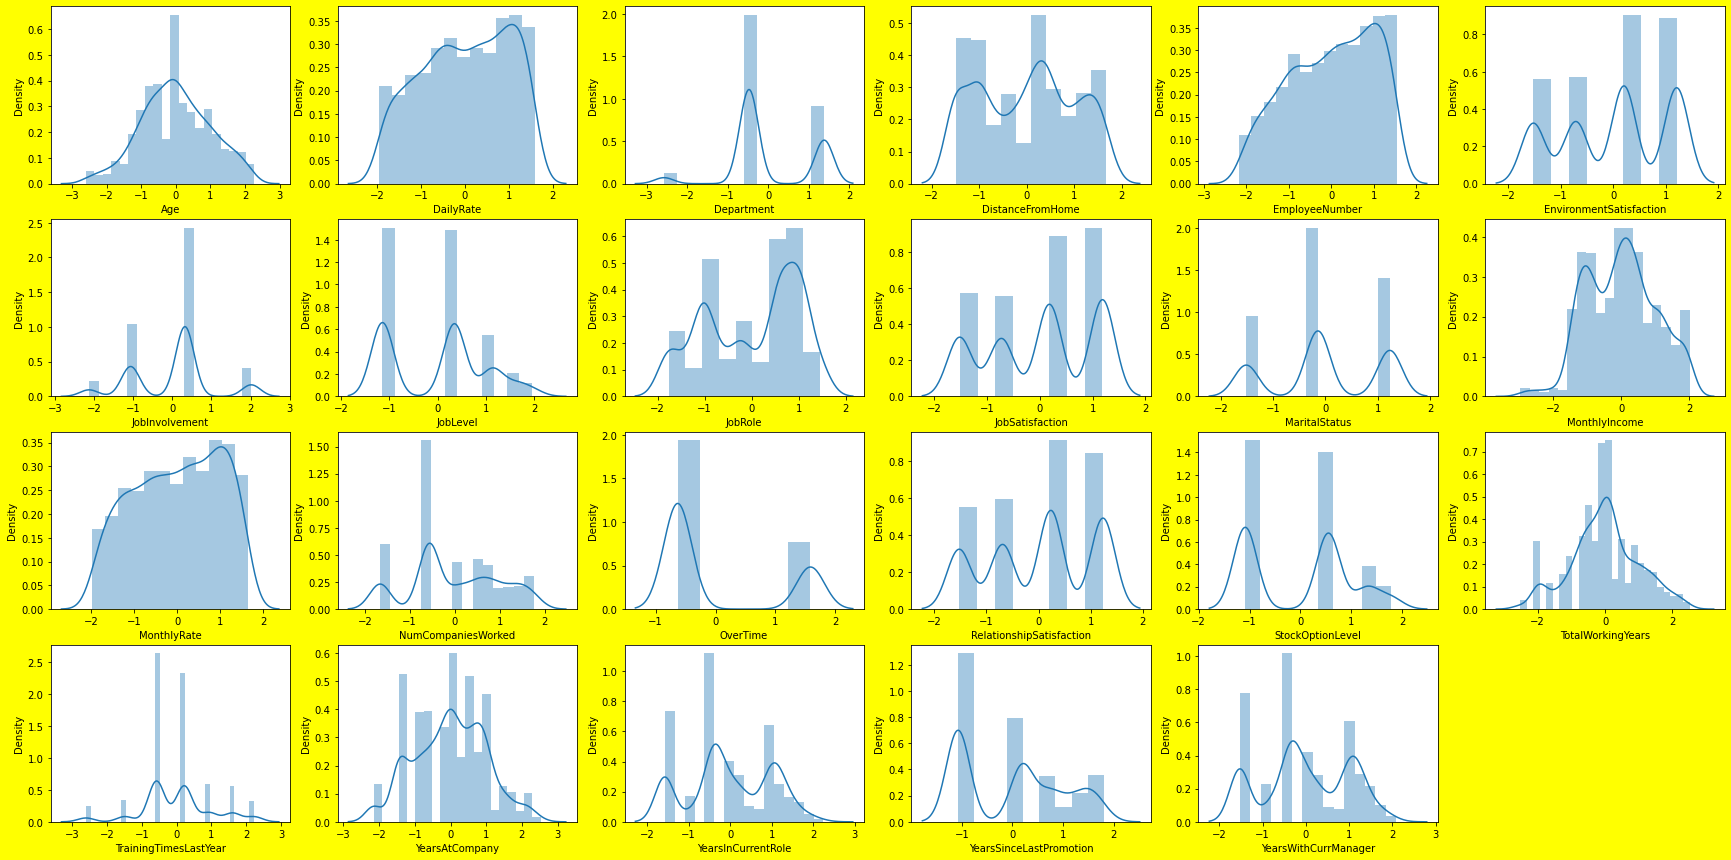

In [69]:
plt.figure(figsize=(30,15),facecolor='yellow')
plotnumber=1

for column in x:
    if plotnumber<=23:
        ax=plt.subplot(4,6,plotnumber)
        sns.distplot(x[column])
    plotnumber=plotnumber+1

plt.show()

# Data Standardisation

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Age,DailyRate,Department,DistanceFromHome,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,NumCompaniesWorked,OverTime,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.610133,0.750615,1.379881,-1.489968,-2.167233,-0.712215,0.322170,0.349828,1.017588,1.186326,...,1.620671,1.584737,-1.524369,-1.084263,-0.173231,-2.608524,0.231837,0.290524,-1.073534,0.582177
1,1.371830,-1.343372,-0.473500,0.244561,-2.157256,0.204826,-1.065841,0.349828,0.596961,-0.725589,...,-0.561880,-0.631019,1.235448,0.548653,0.147620,0.217074,0.948319,1.006575,0.193168,1.018073
2,0.182486,1.337080,-0.473500,-1.028366,-2.139969,1.210036,-1.065841,-1.141761,-1.022696,0.181993,...,1.273711,1.584737,-0.690386,-1.084263,-0.351153,0.217074,-2.156089,-1.571814,-1.073534,-1.528426
3,-0.284736,1.377080,-0.473500,-0.698191,-2.132165,1.210036,0.322170,-1.141761,0.596961,0.181993,...,-0.561880,1.584737,0.235192,-1.084263,-0.173231,0.217074,0.621429,1.006575,1.027520,-1.528426
4,-1.080489,-0.467301,-0.473500,-1.028366,-2.117665,-1.522916,0.322170,-1.141761,-1.022696,-0.725589,...,1.764103,-0.631019,1.235448,0.548653,-0.544046,0.217074,-0.933983,-0.390769,0.722874,-0.347871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,0.069696,0.252885,-0.473500,1.408969,1.533695,0.204826,2.016459,0.349828,-1.022696,1.186326,...,0.798319,-0.631019,0.235192,0.548653,1.039364,0.217074,0.003289,-0.390769,-1.073534,0.018680
1383,0.400794,-0.410602,-0.473500,-0.049519,1.534945,1.210036,-1.065841,1.133237,-1.768432,-1.517783,...,0.798319,-0.631019,-1.524369,0.548653,-0.007630,1.606919,0.436162,1.006575,0.193168,1.018073
1384,-1.080489,-1.754538,-0.473500,-0.440553,1.537447,-0.712215,2.016459,0.349828,-0.227587,-0.725589,...,-0.561880,1.584737,-0.690386,0.548653,-0.544046,-2.608524,0.231837,-0.390769,-1.073534,0.018680
1385,1.371830,0.573286,1.379881,-1.028366,1.538697,1.210036,-1.065841,0.349828,1.017588,-0.725589,...,0.052119,-0.631019,1.235448,-1.084263,1.039364,0.217074,0.791264,0.793764,-1.073534,1.205782


# Check for multicollierinity

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif1']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif

,vif1,features
0,1.879790,Age
1,1.021725,DailyRate
2,2.151713,Department
3,1.014927,DistanceFromHome
4,1.020216,EmployeeNumber
5,1.018162,EnvironmentSatisfaction
6,1.015591,JobInvolvement
7,5.914184,JobLevel
8,2.011914,JobRole
9,1.014935,JobSatisfaction


In [72]:
x=x.drop(columns=['YearsAtCompany'],axis=1)

In [73]:
vif=pd.DataFrame()
vif['vif1']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif

,vif1,features
0,1.876780,Age
1,1.021016,DailyRate
2,2.150989,Department
3,1.014851,DistanceFromHome
4,1.018151,EmployeeNumber
5,1.018153,EnvironmentSatisfaction
6,1.015116,JobInvolvement
7,5.907808,JobLevel
8,2.011410,JobRole
9,1.013089,JobSatisfaction


In [74]:
x=x.drop(columns=['JobLevel'],axis=1)

In [75]:
vif=pd.DataFrame()
vif['vif1']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif

,vif1,features
0,1.876600,Age
1,1.019865,DailyRate
2,2.058919,Department
3,1.012096,DistanceFromHome
4,1.018094,EmployeeNumber
5,1.014573,EnvironmentSatisfaction
6,1.015106,JobInvolvement
7,1.989514,JobRole
8,1.013016,JobSatisfaction
9,2.282843,MaritalStatus


We can observe that multicollinearity is removed .VIF value is less than 5 for all feature 

# Model Training and Building

# Random Forest

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve

### Finding the best random state

In [78]:
max_acc=0
max_rs=0

for i in range(0,200):
    x_train_ns,x_test,y_train_ns,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    rf=RandomForestClassifier()
    rf.fit(x_train_ns,y_train_ns)
    pred_rf=rf.predict(x_test)
    accuracy=accuracy_score(y_test,pred_rf)
    print('Testing accuracy', accuracy,'random state',i)
    
    if accuracy>max_acc:
        max_acc=accuracy
        max_rs=i
        print('max_accuracy',max_acc,'max_random_state',i)
        

Testing accuracy 0.8597122302158273 random state 0
max_accuracy 0.8597122302158273 max_random_state 0
Testing accuracy 0.8381294964028777 random state 1
Testing accuracy 0.8705035971223022 random state 2
max_accuracy 0.8705035971223022 max_random_state 2
Testing accuracy 0.8597122302158273 random state 3
Testing accuracy 0.8525179856115108 random state 4
Testing accuracy 0.8381294964028777 random state 5
Testing accuracy 0.8992805755395683 random state 6
max_accuracy 0.8992805755395683 max_random_state 6
Testing accuracy 0.8633093525179856 random state 7
Testing accuracy 0.8741007194244604 random state 8
Testing accuracy 0.841726618705036 random state 9
Testing accuracy 0.8309352517985612 random state 10
Testing accuracy 0.8705035971223022 random state 11
Testing accuracy 0.8165467625899281 random state 12
Testing accuracy 0.8597122302158273 random state 13
Testing accuracy 0.8273381294964028 random state 14
Testing accuracy 0.8453237410071942 random state 15
Testing accuracy 0.8345323

We are getting higest testing aacuracy at random state of 126

In [79]:
x_train_ns,x_test,y_train_ns,y_test=train_test_split(x,y,random_state=126,test_size=0.20)


In [80]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train_ns)
        print(f"Accuracy score in training:{accuracy_score(y_train_ns,y_pred)*100:2f}%")
        
    elif train==False:
        pred=clf.predict(x_test)
        print(f"Accuracy score in testing:{accuracy_score(y_test,pred)*100:2f}%")
        
        print("Classification report\n",classification_report(y_test,pred,digits=2))

In [81]:
rf.fit(x_train_ns,y_train_ns)

RandomForestClassifier()

In [83]:
metric_score(rf,x_train_ns,x_test,y_train_ns,y_test,train=True)

Accuracy score in training:100.000000%


In [84]:
metric_score(rf,x_train_ns,x_test,y_train_ns,y_test,train=False)

Accuracy score in testing:89.928058%
Classification report
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       245
           1       0.73      0.24      0.36        33

    accuracy                           0.90       278
   macro avg       0.82      0.62      0.65       278
weighted avg       0.89      0.90      0.88       278



### Finding best Cross validation score for logistic regression:

In [85]:
pred_rf=rf.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_rf)
for j in range(2,10):
    cv_score=cross_val_score(rf,x,y,cv=j)
    cv_score_mean=cv_score.mean()
    print("cv at ", j)
    print("Cross validation score is :-", cv_score_mean*100)
    print()

cv at  2
Cross validation score is :- 85.435977727044

cv at  3
Cross validation score is :- 85.003381547658

cv at  4
Cross validation score is :- 85.7242508037514

cv at  5
Cross validation score is :- 85.50710334259668

cv at  6
Cross validation score is :- 85.4362591431557

cv at  7
Cross validation score is :- 85.364774812011

cv at  8
Cross validation score is :- 85.86929439904326

cv at  9
Cross validation score is :- 85.86882651398781



We are getting least difference between testing accuracy and cross val score at cv=9

### Cross Validation Score

In [86]:
lssscore_selected=cross_val_score(rf,x,y,cv=9).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.8529255690546013


# Support Vector Machine(SVM)

In [87]:
from sklearn.svm import SVC

In [88]:
svm=SVC()

In [90]:
svm.fit(x_train_ns,y_train_ns)

SVC()

In [91]:
metric_score(svm,x_train_ns,x_test,y_train_ns,y_test,train=True)

Accuracy score in training:91.253381%


In [92]:
metric_score(svm,x_train_ns,x_test,y_train_ns,y_test,train=False)

Accuracy score in testing:90.647482%
Classification report
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       245
           1       0.67      0.42      0.52        33

    accuracy                           0.91       278
   macro avg       0.80      0.70      0.73       278
weighted avg       0.90      0.91      0.90       278



### Cross Validation Score

In [93]:
cv_score=cross_val_score(svm,x,y,cv=9).mean()
print("the cv score is ",cv_score)

the cv score is  0.8658986175115206


# Decison Tree

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
dt=DecisionTreeClassifier()

In [96]:
dt.fit(x_train_ns,y_train_ns)

DecisionTreeClassifier()

In [97]:
metric_score(dt,x_train_ns,x_test,y_train_ns,y_test,train=True)

Accuracy score in training:100.000000%


In [98]:
metric_score(dt,x_train_ns,x_test,y_train_ns,y_test,train=False)

Accuracy score in testing:80.575540%
Classification report
               precision    recall  f1-score   support

           0       0.92      0.86      0.89       245
           1       0.29      0.42      0.34        33

    accuracy                           0.81       278
   macro avg       0.60      0.64      0.61       278
weighted avg       0.84      0.81      0.82       278



### Cross Validation Score

In [99]:
cv_score=cross_val_score(dt,x,y,cv=9).mean()
print("the cv score is ",cv_score)

the cv score is  0.7851463948238142


# Gradient Boosting Tree

In [100]:
from sklearn.ensemble import GradientBoostingClassifier

In [101]:
gbt=GradientBoostingClassifier()

In [102]:
gbt.fit(x_train_ns,y_train_ns)

GradientBoostingClassifier()

In [103]:
metric_score(gbt,x_train_ns,x_test,y_train_ns,y_test,train=True)

Accuracy score in training:94.048693%


In [104]:
metric_score(gbt,x_train_ns,x_test,y_train_ns,y_test,train=False)

Accuracy score in testing:89.568345%
Classification report
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       245
           1       0.59      0.39      0.47        33

    accuracy                           0.90       278
   macro avg       0.76      0.68      0.71       278
weighted avg       0.88      0.90      0.89       278



### Cross Validation score

In [105]:
cv_score=cross_val_score(gbt,x,y,cv=9).mean()
print("the cv score is ",cv_score)

the cv score is  0.8579714192617418


# Conclusion
We can observe that at random state 126 and cv=9

SVM

 ------Testing Accuracy:90.64 and Cross val score:86.58--------
            
Random Forest

 ------Testing Accuracy:89.92 and Cross val score:85.29--------
            
Decision Tree

 ------Testing Accuracy:80.57 and Cross val score:78.51--------
            
Gradient Boosting Trees

------ Testing Accuracy:89.56 and Cross val score:85.79--------


# Plotting auc for all models

Text(0.5, 1.0, 'Recieving operating characterstics')

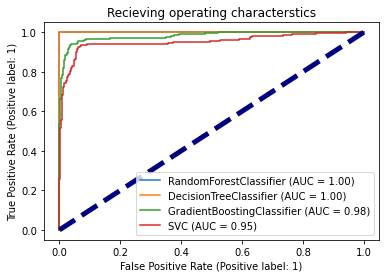

In [107]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve


disp=plot_roc_curve(rf,x_train_ns,y_train_ns)
plot_roc_curve(dt,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(gbt,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(svm,x_train_ns,y_train_ns,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.plot([0,1],[0,1],color='navy',lw=5,linestyle='--')
plt.title('Recieving operating characterstics')


We can conclude Random Forest is the best model for this dataset as it has maximum AUC Score and testing accuracy

# Hyperparameter Tuning

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
params={'n_estimators':[10,20,50,100],
       'criterion':['entropy','gini'],
       'max_depth':[10,20,30,40,50,60,70,80,90,100],
       'min_samples_split':[2,3,4,5,6,7,8,9,10],
       'bootstrap':[True,False],
       'min_samples_leaf':[2,3,4,5,6,7,8,9,10] 
       }

In [113]:
grd=GridSearchCV(estimator=rf,param_grid=params,n_jobs=-1)

In [114]:
grd.fit(x_train_ns,y_train_ns)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 20, 50, 100]})

In [116]:
print('best_parameters',grd.best_params_)

best_parameters {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 100, 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 10}


In [118]:
rf=RandomForestClassifier(bootstrap=False,criterion='entropy',max_depth=100,min_samples_leaf=4,min_samples_split=9,n_estimators=10)

In [119]:
rf.fit(x_train_ns,y_train_ns)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=100,
                       min_samples_leaf=4, min_samples_split=9,
                       n_estimators=10)

In [120]:
metric_score(rf,x_train_ns,x_test,y_train_ns,y_test,train=True)

Accuracy score in training:97.114518%


In [121]:
metric_score(rf,x_train_ns,x_test,y_train_ns,y_test,train=False)

Accuracy score in testing:89.568345%
Classification report
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       245
           1       0.62      0.30      0.41        33

    accuracy                           0.90       278
   macro avg       0.77      0.64      0.68       278
weighted avg       0.88      0.90      0.88       278

